# Vehicle Sales and Market Trends Dataset

This notebook provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.


__Content:__
1. Data Exploration
1. Data Cleaning
1. Data Visulaistion

__Features:__ <br>
1. __Year:__ Manufacturing year  <br>
1. __Make:__ vehicle manufacturer<br>
1. __Model:__ Vehicle's Model <br>
1. __Trim:__  the trim levels for a vehicle are just different versions of the model<br>
1. __Body:__ Mileage indicator <br>
1. __Transmmision:__ Transmission type <br>
1. __Vin:__ Vehicle Identification Number<br>
1. __State:__ state of registration <br>
1. __Condition:__ condition rating <br>
1. __Odometer:__ Mileage indicator <br>
1. __Color:__ Exterior color <br>
1. __Interior:__ Interior color <br>
1. __Seller:__ seller information <br>
1. __MMR:__ Standard price on market <br>
1. __Sellingprice:__ Selling-Price <br>
1. __SaleDate:__ Sale date <br>

# Questions to Be Answered with the Dataset

1. What is the Price Variation Through Time?
1. What is the price variation according to mileage?
1. What is the top 10 Best-Selling Models?
1. What Are the Most Expensive model?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
#sys.path


In [3]:
# read the csv file
df = pd.read_csv('car_prices.csv')

# Data Exploration

In [4]:
df.head(4)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)


In [5]:
df.tail(4)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,34.0,15008.0,gray,gray,ford motor credit company llc pd,29600.0,26700.0,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [6]:
# get the number of records and columns
df.shape

(558837, 16)

In [7]:
# get concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [8]:
# check duplicate values
df.duplicated().sum()

0

In [9]:
# check missing values
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

# Data cleaning

In [10]:
df = pd.DataFrame(df, columns=['year','make', 'model', 'trim','body','transmission','vin','state','condition','odometer',\
    'color','interior','seller','mmr','sellingprice','saledate'])

In [11]:
df= df.dropna(axis=0,how='any')

In [12]:
# check missing values
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB


# Data Visulaistion

In [14]:
#staticties results
df.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [15]:
#Best selling models
models = df['model'].value_counts().nlargest(10)
print(models)

model
Altima      16346
Fusion      12116
F-150       11950
Camry       10986
Escape      10656
Focus        9547
Accord       8528
Impala       7500
3 Series     7132
Civic        7068
Name: count, dtype: int64


# What is the Price Variation Through Time?

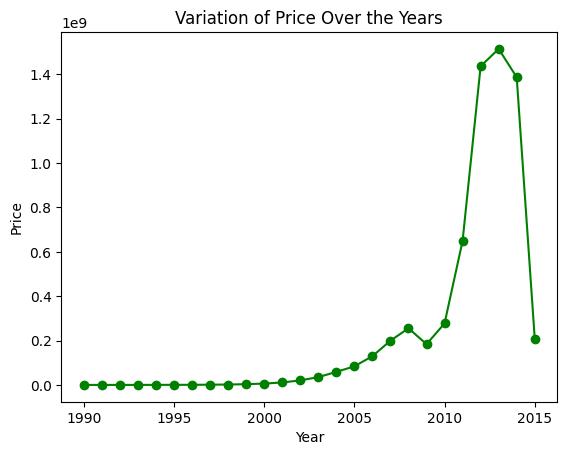

In [16]:
# price variation over the time
df.groupby('year')['sellingprice'].sum().plot(marker = 'o', c = 'g')
plt.title('Variation of Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Price');

# What is the price variation according to mileage?

Text(0, 0.5, 'Standard Value On Market (MMR)')

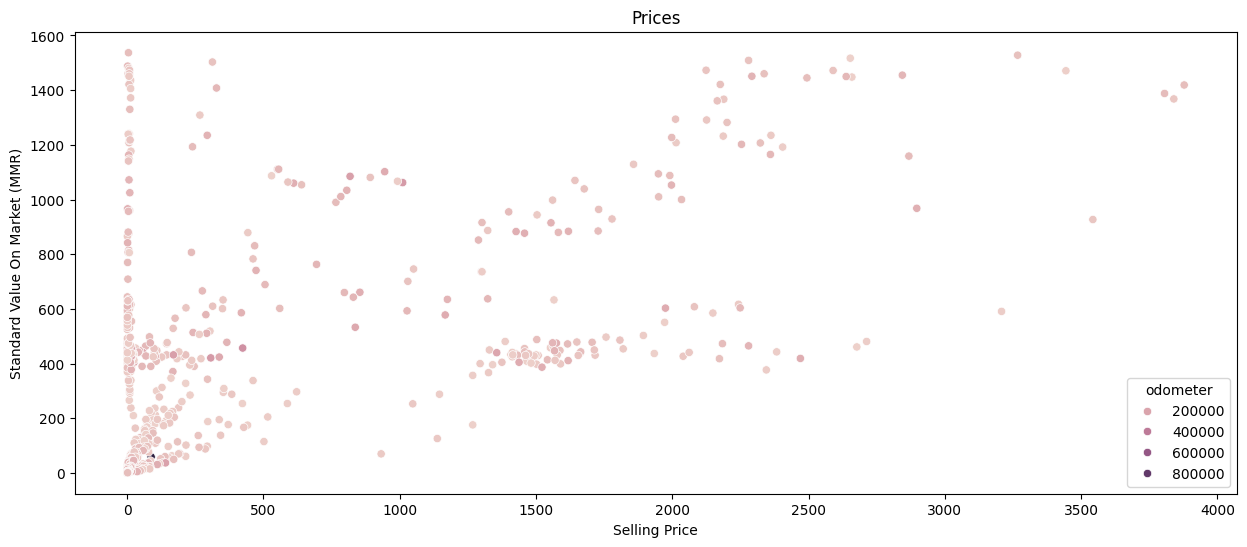

In [17]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title('Prices')
ax = sns.scatterplot(x = df['sellingprice'].value_counts().nlargest(100000), y = df['mmr'].value_counts().nlargest(100000),\
    hue='odometer',data=df);
plt.xlabel('Selling Price')
plt.ylabel('Standard Value On Market (MMR)')

 # First Report

This graph shows the variation of prices between the standard value on market and selling-price caused by several factors, one of those factors is the use of cars before selling, a view was obtained using the odometer as an indicator to get the different mileage of cars and his influence on the prices.

This scatter data viz was selected to help sellers get an idea about why they sold the cars at those prices.

Is recommended to do a valuation of market to know what can do sellers to improve his selling on market without a high margin of losses, this will be a help to get a better comprehension of selling reducing losses and get earnings.

Considering the aforementioned, it's important to know the others that can affect the prices on the market to know how they can solve these fluctuations in the prices of sales.  

The factors that can affect and is important to take in count and research their influence are:
How Many Trim Levels Are Usually Offered?
Depending on the manufacturer and the model there can be as few as one trim or up to six or more for some vehicles. Per Consumer Reports, In most cases, there are four or five trims. The base trim, or the entry-level model, usually doesn't have much equipment, but it is the most affordable. Each trim level after this offers more features and options until you get to the highest level trim. This usually has almost all of the features from the lower trims with some extras thrown in as well. The highest trim is the most expensive, and for most makes and models it offers features such as heated seats, leather upholstery, the best infotainment system, and all the advanced safety equipment.
Another thing to take into account is which is the better transmission ? And which do they prefer? the pros and cons of manual and automatic transmissions.




# What is the top 10 Best-Selling Models?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Altima'),
  Text(1, 0, 'Fusion'),
  Text(2, 0, 'F-150'),
  Text(3, 0, 'Camry'),
  Text(4, 0, 'Escape'),
  Text(5, 0, 'Focus'),
  Text(6, 0, 'Accord'),
  Text(7, 0, 'Impala'),
  Text(8, 0, '3 Series'),
  Text(9, 0, 'Civic')])

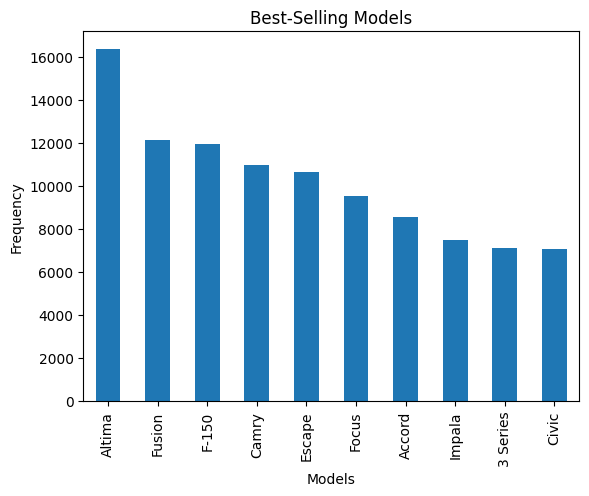

In [18]:
df['model'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Best-Selling Models')
plt.ylabel('Frequency')
plt.xlabel('Models')
plt.xticks(rotation = 90)

# Second Report

This graph shows a counting of the top 10 best-selling models on market, this will be a help to the seller to know what are the most requested models on market.
Is recommended to get more models like these with different trim levels and different transmission to different types of clients.

Is important to take into account the quality of these models  to know why they are the  Top 10 best-selling.

This will help them know why they are the most requested and have a better knowledge of the market.

It is good to know why they prefer them since this way they will be able to include other new models on the market that meet these previously investigated conditions.
